In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

<h2>Converting the image to L*a*b* color space </h2>

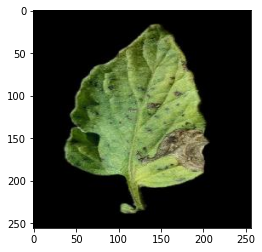

In [55]:
#importing the image
eb1=cv2.cvtColor(cv2.imread('EB4.jpg'),cv2.COLOR_BGR2RGB)
rows,col,channels=eb1.shape
plt.imshow(eb1)

In [56]:
#converting each pixel from rgb to xyz value
eb1c=eb1.copy().reshape(rows*col,channels)
xyzArr=[]
#looping through each pixel
for index,pixel in enumerate(eb1c):
    sR,sG,sB=pixel
    r = ( sR / 255 )
    g = ( sG / 255 )
    b = ( sB / 255 )

    if r > 0.04045:
        r = ( ( r + 0.055 ) / 1.055 )** 2.4
    else:                   
        r = r / 12.92
        
    if g > 0.04045:
        g=( ( g + 0.055 ) / 1.055 )**2.4
        
    else:                   
        g = g / 12.92
        
    if b > 0.04045: 
        b = ( ( b + 0.055 ) / 1.055 )** 2.4
    else:
        b = b / 12.92

    r = r * 100
    g = g * 100
    b = b * 100

    x = r * 0.4124 + g * 0.3576 + b * 0.1805
    y = r * 0.2126 + g * 0.7152 + b * 0.0722
    z = r * 0.0193 + g * 0.1192 + b * 0.9505
    xyzArr.append([x,y,z])
xyzArr=np.array(xyzArr)

In [57]:
#converting each pixel from xyz to cielab color space
labArr=[]
for value in xyzArr:
    x,y,z=value
    refX=94.811
    refY=100.000
    refZ=107.304

    x = x / refX
    y = y / refY
    z = z / refZ

    if x > 0.008856 :
            x = x ** ( 1/3 )
            
    else:                    
        x = ( 7.787 * x ) + ( 16 / 116 )
        
    if y > 0.008856 : 
        y = y ** ( 1/3 )
        
    else:
        y = ( 7.787 * y ) + ( 16 / 116 )
        
    if  z > 0.008856:
        z = z**( 1/3 )
        
    else:
        z = ( 7.787 * z ) + ( 16 / 116 )
        

    ciel = (( 116 * x ) - 16)*255/100
    ciea = (500 * ( x - y ))+128
    cieb = (200 * ( y - z ))+128
    labArr.append([ciel,ciea,cieb])
    
labArr=np.array(labArr).reshape(rows,col,channels)

<h2>L channel</h2>

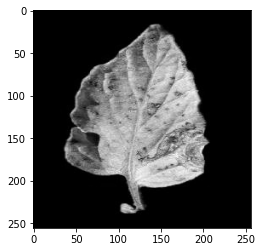

In [64]:
lchannel=labArr[:,:,0]
plt.imshow(lchannel,cmap='gray')

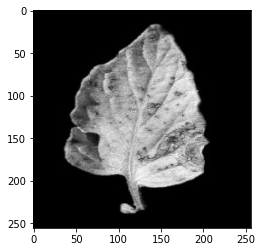

In [65]:
ebc=cv2.cvtColor(eb1,cv2.COLOR_RGB2Lab)
l=ebc[:,:,0]
plt.imshow(l,cmap='gray')

<h2>a* channel</h2>

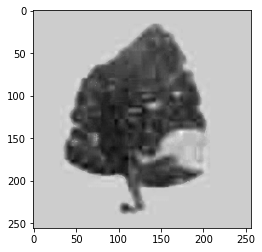

In [66]:
achannel=labArr[:,:,1]
plt.imshow(achannel,cmap='gray')

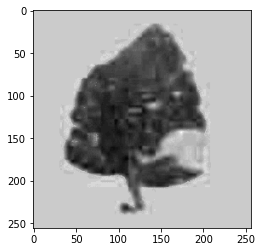

In [67]:
a=ebc[:,:,1]
plt.imshow(a,cmap='gray')

<h2>b*channel</h2>

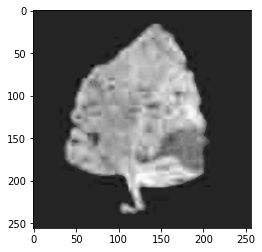

In [68]:
bchannel=labArr[:,:,2]
plt.imshow(bchannel,cmap='gray')

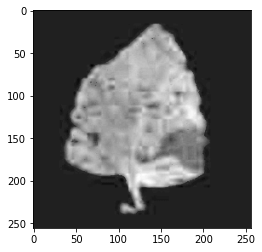

In [69]:
b=ebc[:,:,2]
plt.imshow(b,cmap='gray')